In [25]:
# from hmmlearn import hmm
import numpy as np
import pandas as pd
from collections import defaultdict
import datetime
# import pykovy-master/ 
from pykovy.src.pykovy import chain
import sqlite3
from sqlalchemy import create_engine

In [26]:
df = pd.read_csv('data_sample/20180225_162239_034.csv')
df = df[['Client Username', 'Association Time','Map Location', 'Session Duration']]

In [27]:
def convertMonth(month):
    if month == 'Jan': return 1
    elif month == 'Feb': return 2
    elif month == 'Mar': return 3
    elif month == 'Apr': return 4
    elif month == 'May': return 5
    elif month == 'Jun': return 6
    elif month == 'Jul': return 7
    elif month == 'Aug': return 8
    elif month == 'Sep': return 9
    elif month == 'Oct': return 10
    elif month == 'Nov': return 11
    elif month == 'Dec': return 12
    else: print('error input is not correct')
        
def convert_time_slot(time):
    temp = (time.hour * 60 + time.minute) * 60 + time.second
    return int(temp/(5*60) + 1)

def convert_time(time):
    return time.split(':')

print(convert_time('13:42:56')[0])             

13


In [28]:
# Get number of users using an AP by date
# need modification for more fine grain time
# input is a panda dataframe
def get_number_of_users_by_date(df):
    df.shape[0]
    temp = df.iloc[0,3].split()
    #temp2 = df.iloc[0,2]
    #temp2
    result = {}
    client_list = {}
    for i in range(df.shape[0]):
        association_time = df.iloc[i,1].split()
        temp1 = df.iloc[i,3].split()
        AP_name = df.iloc[i,2]
        client_username = df.iloc[i,0]
    
        if len(temp1) == 2: sess_duration = int(temp1[0])
        elif len(temp1) == 4: sess_duration = int(temp1[0]) * 60 + int(temp1[2])
        elif len(temp1) == 6: sess_duration = (int(temp1[0]) * 60 + int(temp1[2])) * 60 + int(temp1[4])
        else: print('error')

        d_time = datetime.datetime(year=int(association_time[5]), 
                                   month=convertMonth(association_time[1]), 
                                   day=int(association_time[2]))
        
        if AP_name not in result:
            # new AP, just add it to the list
            day_dict = {}
            day_dict[str(d_time)] = float(1)
            result[AP_name] = day_dict
            client_list[client_username] = []
            client_list[client_username].append(str(d_time))
        else:
            if result[AP_name].get(str(d_time)):
                # time entry already in the list
                # need to check if the user is already counted
                # for that time slot
                # if not, then add this in the list
                if client_username not in client_list:
                    result[AP_name][str(d_time)] += 1.0
                    client_list[client_username] = []
                    client_list[client_username].append(str(d_time))
                    #client_list[client_username] = 1
                else:
                    if str(d_time) not in client_list[client_username]:
                        result[AP_name][str(d_time)] += 1.0
                        client_list[client_username].append(str(d_time))
            else:
                # new time entry, just add it to the list
                result[AP_name][str(d_time)] = 1.0
                client_list[client_username] = []
                client_list[client_username].append(str(d_time))
                #client_list[client_username] = 1
    
    #print(client_list)
    return result   
    #data_dict2[df.iloc[i,0]].append([d_time, df.iloc[i,2], sess_duration])

output = get_number_of_users_by_date(df)
output['SJSUWIFI > ENG > Floor 2']
#pd.DataFrame(list(output.items()))
pd.DataFrame(output)

,Offsite > Hammer outdoor > Hammer outdoor,SJSUWIFI > ENG > Floor 4,Campus Housing > CVB > Floor 7,SJSUWIFI > ENG > Floor 2,MLKL LIbrary > MLKL > Mez,MLKL LIbrary > MLKL > Second,MLKL LIbrary > MLKL > Third,Campus Housing > JWH > Floor 8,Campus Housing > JWH > Floor 9,Campus Housing > JWH > Floor 10,...,SJSUWIFI > CCB > Floor 2,SJSUWIFI > BT > Floor 5,SJSUWIFI > TH-MD > Floor 2,SJSUWIFI > UPD > Floor 3,SJSUWIFI > BT > Floor 4,SJSUWIFI > BT > Floor 2,SJSUWIFI > HB > Floor 3,Offsite > Hammer > Floor 4,MLML > Sandholdt Office and dorm > 1st floor,SJSUWIFI > WSQ > Floor 0
2018-02-24 00:00:00,162.0,15.0,108.0,97.0,55.0,62.0,26.0,43.0,24.0,42.0,...,2.0,2.0,1.0,1.0,4.0,3.0,1.0,NaN,NaN,NaN
2018-02-25 00:00:00,167.0,22.0,128.0,119.0,62.0,82.0,51.0,41.0,35.0,50.0,...,2.0,1.0,2.0,1.0,6.0,1.0,1.0,1.0,2.0,1.0


In [29]:
# Get number of users using an AP by hour
# need modification for more fine grain time
# input is a panda dataframe
# TODO: need to check for user_name
def get_number_of_users_by_hour(df):
    df.shape[0]
    temp = df.iloc[0,3].split()
    #temp2 = df.iloc[0,2]
    #temp2
    result = {}
    client_list = {}
    for i in range(df.shape[0]):
        association_time = df.iloc[i,1].split()
        temp1 = df.iloc[i,3].split()
        AP_name = df.iloc[i,2]
        client_username = df.iloc[i,1]
    
        if len(temp1) == 2: sess_duration = int(temp1[0])
        elif len(temp1) == 4: sess_duration = int(temp1[0]) * 60 + int(temp1[2])
        elif len(temp1) == 6: sess_duration = (int(temp1[0]) * 60 + int(temp1[2])) * 60 + int(temp1[4])
        else: print('error')

        d_time = datetime.datetime(year=int(association_time[5]), 
                                   month=convertMonth(association_time[1]), 
                                   day=int(association_time[2]),
                                   hour=int(convert_time(association_time[3])[0]))
        #d_time = d_time.timestamp()
        if AP_name not in result:
            # new AP, just add it to the list
            day_dict = {}
            day_dict[str(d_time)] = 1
            result[AP_name] = day_dict
            client_list[client_username] = 1
        else:  
            if result[AP_name].get(str(d_time)):
                # time entry already in the list
                # need to check if the user is already counted
                # if not, then add this in the list
                if client_username not in client_list:
                    result[AP_name][str(d_time)] += 1
                    client_list[client_username] = 1
            else:
                # new time entry, just add it to the list
                result[AP_name][str(d_time)] = 1
                client_list[client_username] = 1
            
    return result   
    #data_dict2[df.iloc[i,0]].append([d_time, df.iloc[i,2], sess_duration])

output = get_number_of_users_by_hour(df)
#output['Campus Housing > CV2 > 4th floor']
df = pd.DataFrame(output)
df

,Offsite > Hammer outdoor > Hammer outdoor,SJSUWIFI > ENG > Floor 4,Campus Housing > CVB > Floor 7,SJSUWIFI > ENG > Floor 2,MLKL LIbrary > MLKL > Mez,MLKL LIbrary > MLKL > Second,MLKL LIbrary > MLKL > Third,Campus Housing > JWH > Floor 8,Campus Housing > JWH > Floor 9,Campus Housing > JWH > Floor 10,...,SJSUWIFI > CCB > Floor 2,SJSUWIFI > BT > Floor 5,SJSUWIFI > TH-MD > Floor 2,SJSUWIFI > UPD > Floor 3,SJSUWIFI > BT > Floor 4,SJSUWIFI > BT > Floor 2,SJSUWIFI > HB > Floor 3,Offsite > Hammer > Floor 4,MLML > Sandholdt Office and dorm > 1st floor,SJSUWIFI > WSQ > Floor 0
2018-02-24 16:00:00,1.0,4.0,1,1,1.0,1.0,1.0,2,1,1,...,1.0,NaN,1.0,NaN,1.0,1.0,NaN,NaN,NaN,NaN
2018-02-24 17:00:00,1.0,1.0,5,1,1.0,1.0,1.0,1,2,1,...,NaN,1.0,NaN,1.0,1.0,1.0,NaN,NaN,NaN,NaN
2018-02-24 18:00:00,1.0,1.0,2,1,1.0,1.0,1.0,1,1,1,...,NaN,1.0,NaN,NaN,1.0,1.0,NaN,NaN,NaN,NaN
2018-02-24 19:00:00,1.0,1.0,1,1,1.0,1.0,NaN,2,1,1,...,NaN,NaN,1.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN
2018-02-24 20:00:00,1.0,1.0,2,1,1.0,1.0,1.0,1,1,1,...,1.0,NaN,NaN,NaN,1.0,1.0,NaN,NaN,NaN,NaN
2018-02-24 21:00:00,1.0,1.0,3,1,1.0,1.0,NaN,1,1,1,...,NaN,1.0,NaN,NaN,NaN,1.0,1.0,NaN,NaN,NaN
2018-02-24 22:00:00,1.0,1.0,2,1,1.0,NaN,NaN,1,2,1,...,NaN,NaN,NaN,NaN,1.0,1.0,NaN,NaN,NaN,NaN
2018-02-24 23:00:00,1.0,NaN,1,1,1.0,1.0,NaN,2,2,1,...,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-02-25 00:00:00,1.0,1.0,8,1,1.0,1.0,NaN,1,1,1,...,1.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
2018-02-25 01:00:00,1.0,1.0,4,1,1.0,1.0,NaN,1,1,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [32]:
df = df.fillna(0)
df.to_csv('test6.csv')

In [6]:
import matplotlib.pylab as plt
%matplotlib inline

In [33]:
df = pd.read_csv('test6.csv', parse_dates=['Time'], index_col='Time')
df

,Campus Housing > CVB > Floor 7,SJSUWIFI > ENG > Floor 2,MLKL LIbrary > MLKL > Mez,MLKL LIbrary > MLKL > Second,MLKL LIbrary > MLKL > Third,Campus Housing > JWH > Floor 8,Campus Housing > JWH > Floor 9,Campus Housing > JWH > Floor 10,SJSUWIFI > Dining Commons > main floor,Campus Housing > CVC > Floor 5,...,SJSUWIFI > CCB > Floor 2,SJSUWIFI > BT > Floor 5,SJSUWIFI > TH-MD > Floor 2,SJSUWIFI > UPD > Floor 3,SJSUWIFI > BT > Floor 4,SJSUWIFI > BT > Floor 2,SJSUWIFI > HB > Floor 3,Offsite > Hammer > Floor 4,MLML > Sandholdt Office and dorm > 1st floor,SJSUWIFI > WSQ > Floor 0
Time,,,,,,,,,,,,,,,,,,,,,
2018-02-24 16:00:00,1,1,1,1,1,2,1,1,1,2,...,1,0,1,0,1,1,0,0,0,0
2018-02-24 17:00:00,5,1,1,1,1,1,2,1,4,1,...,0,1,0,1,1,1,0,0,0,0
2018-02-24 18:00:00,2,1,1,1,1,1,1,1,1,1,...,0,1,0,0,1,1,0,0,0,0
2018-02-24 19:00:00,1,1,1,1,0,2,1,1,1,3,...,0,0,1,0,0,1,0,0,0,0
2018-02-24 20:00:00,2,1,1,1,1,1,1,1,1,1,...,1,0,0,0,1,1,0,0,0,0
2018-02-24 21:00:00,3,1,1,1,0,1,1,1,1,3,...,0,1,0,0,0,1,1,0,0,0
2018-02-24 22:00:00,2,1,1,0,0,1,2,1,1,3,...,0,0,0,0,1,1,0,0,0,0
2018-02-24 23:00:00,1,1,1,1,0,2,2,1,1,2,...,1,0,0,0,0,0,0,0,0,0
2018-02-25 00:00:00,8,1,1,1,0,1,1,1,1,5,...,1,0,0,0,1,0,0,0,0,0


In [34]:
df["Campus Housing > CVB > Floor 7"] 

Time
2018-02-24 16:00:00    1
2018-02-24 17:00:00    5
2018-02-24 18:00:00    2
2018-02-24 19:00:00    1
2018-02-24 20:00:00    2
2018-02-24 21:00:00    3
2018-02-24 22:00:00    2
2018-02-24 23:00:00    1
2018-02-25 00:00:00    8
2018-02-25 01:00:00    4
2018-02-25 02:00:00    2
2018-02-25 03:00:00    1
2018-02-25 04:00:00    4
2018-02-25 05:00:00    3
2018-02-25 06:00:00    3
2018-02-25 07:00:00    2
2018-02-25 08:00:00    4
2018-02-25 09:00:00    1
2018-02-25 10:00:00    3
2018-02-25 11:00:00    1
2018-02-25 12:00:00    2
2018-02-25 13:00:00    2
2018-02-25 14:00:00    3
2018-02-25 15:00:00    3
2018-02-25 16:00:00    1
Name: Campus Housing > CVB > Floor 7, dtype: int64

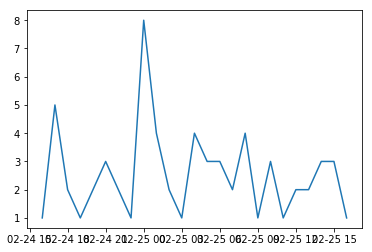

In [35]:
plt.plot(df["Campus Housing > CVB > Floor 7"])

In [36]:
type(df[["Campus Housing > CVB > Floor 7"] ])

pandas.core.frame.DataFrame

In [37]:
# AR example
from statsmodels.tsa.ar_model import AR
from random import random
# contrived dataset
data = df['Campus Housing > CVB > Floor 7']
# fit model
model = AR(data)
model_fit = model.fit()
# make prediction
yhat = model_fit.predict(len(data), len(data))
print(yhat)

2018-02-25 17:00:00    3.345771
Freq: H, dtype: float64


/Users/taipham/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)
